In [1]:
# import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import calendar
%matplotlib inline




In [2]:
# Preliminary examination
# Read smaller part of data file (10000 rows) and show sample using t delimiter as it's a txt file

#data = pd.read_csv(r'..\data\raw\ebd_NL_201501_202309_smp_relAug-2023.txt', nrows=10000, delimiter='\t')
data_full = pd.read_csv(r'..\data\raw\ebd_NL_201501_202309_smp_relAug-2023.txt', delimiter='\t')
data = data_full.sample(n=10000, random_state=42)  # random_state for reproducibility

print(data)


data.head()

C:\Users\desgr\AppData\Local\Temp\ipykernel_18500\129888860.py:5: DtypeWarning: Columns (19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data_full = pd.read_csv(r'..\data\raw\ebd_NL_201501_202309_smp_relAug-2023.txt', delimiter='\t')


                                GLOBAL UNIQUE IDENTIFIER  \
988538   URN:CornellLabOfOrnithology:EBIRD:OBS1231543425   
815791   URN:CornellLabOfOrnithology:EBIRD:OBS1108155474   
1538863  URN:CornellLabOfOrnithology:EBIRD:OBS1668883279   
360725    URN:CornellLabOfOrnithology:EBIRD:OBS737758941   
1791352  URN:CornellLabOfOrnithology:EBIRD:OBS1809452658   
...                                                  ...   
614988    URN:CornellLabOfOrnithology:EBIRD:OBS935047078   
20560     URN:CornellLabOfOrnithology:EBIRD:OBS646184988   
582049    URN:CornellLabOfOrnithology:EBIRD:OBS932451526   
93921     URN:CornellLabOfOrnithology:EBIRD:OBS450144359   
680419    URN:CornellLabOfOrnithology:EBIRD:OBS979859409   

                   LAST EDITED DATE  TAXONOMIC ORDER CATEGORY  \
988538   2021-09-06 08:08:53.918924             6118  species   
815791   2022-10-21 16:39:18.661917            31809  species   
1538863  2023-03-29 16:21:55.497973            26675  species   
360725   2022-10-22

,GLOBAL UNIQUE IDENTIFIER,LAST EDITED DATE,TAXONOMIC ORDER,CATEGORY,TAXON CONCEPT ID,COMMON NAME,SCIENTIFIC NAME,SUBSPECIES COMMON NAME,SUBSPECIES SCIENTIFIC NAME,EXOTIC CODE,...,NUMBER OBSERVERS,ALL SPECIES REPORTED,GROUP IDENTIFIER,HAS MEDIA,APPROVED,REVIEWED,REASON,TRIP COMMENTS,SPECIES COMMENTS,Unnamed: 49
988538,URN:CornellLabOfOrnithology:EBIRD:OBS1231543425,2021-09-06 08:08:53.918924,6118,species,avibase-A7B17EFC,Green Sandpiper,Tringa ochropus,NaN,NaN,NaN,...,1.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN
815791,URN:CornellLabOfOrnithology:EBIRD:OBS1108155474,2022-10-21 16:39:18.661917,31809,species,avibase-32635892,Eurasian Linnet,Linaria cannabina,NaN,NaN,NaN,...,1.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN
1538863,URN:CornellLabOfOrnithology:EBIRD:OBS1668883279,2023-03-29 16:21:55.497973,26675,species,avibase-AF700208,Eurasian Wren,Troglodytes troglodytes,NaN,NaN,NaN,...,1.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN
360725,URN:CornellLabOfOrnithology:EBIRD:OBS737758941,2022-10-22 22:18:10.571624,23610,species,avibase-58C502EA,Barn Swallow,Hirundo rustica,NaN,NaN,NaN,...,1.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN
1791352,URN:CornellLabOfOrnithology:EBIRD:OBS1809452658,2023-08-22 14:20:14.089265,505,species,avibase-85625D75,Mallard,Anas platyrhynchos,NaN,NaN,NaN,...,1.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN


In [3]:
data.columns

Index(['GLOBAL UNIQUE IDENTIFIER', 'LAST EDITED DATE', 'TAXONOMIC ORDER',
       'CATEGORY', 'TAXON CONCEPT ID', 'COMMON NAME', 'SCIENTIFIC NAME',
       'SUBSPECIES COMMON NAME', 'SUBSPECIES SCIENTIFIC NAME', 'EXOTIC CODE',
       'OBSERVATION COUNT', 'BREEDING CODE', 'BREEDING CATEGORY',
       'BEHAVIOR CODE', 'AGE/SEX', 'COUNTRY', 'COUNTRY CODE', 'STATE',
       'STATE CODE', 'COUNTY', 'COUNTY CODE', 'IBA CODE', 'BCR CODE',
       'USFWS CODE', 'ATLAS BLOCK', 'LOCALITY', 'LOCALITY ID', 'LOCALITY TYPE',
       'LATITUDE', 'LONGITUDE', 'OBSERVATION DATE',
       'TIME OBSERVATIONS STARTED', 'OBSERVER ID', 'SAMPLING EVENT IDENTIFIER',
       'PROTOCOL TYPE', 'PROTOCOL CODE', 'PROJECT CODE', 'DURATION MINUTES',
       'EFFORT DISTANCE KM', 'EFFORT AREA HA', 'NUMBER OBSERVERS',
       'ALL SPECIES REPORTED', 'GROUP IDENTIFIER', 'HAS MEDIA', 'APPROVED',
       'REVIEWED', 'REASON', 'TRIP COMMENTS', 'SPECIES COMMENTS',
       'Unnamed: 49'],
      dtype='object')

In [ ]:
display(data.info())

In [7]:
# Function to sample some random rows

def random_sample_data(df, rows=20, seed=None):
    
    ''' this function samples a random selection of
        20 rows within the dataframe and shows 
        the results'''
    
    sampled_data = df.sample(rows, random_state=seed)
    for col in df.columns:
        print(f"Column: {col}")
        print(sampled_data[col])
        print("\n" + "-"*50 + "\n")
# ensures the randomn selection uses the same seed
display(random_sample_data(data, seed=42))




Column: GLOBAL UNIQUE IDENTIFIER
659331     URN:CornellLabOfOrnithology:EBIRD:OBS1053398564
1722349    URN:CornellLabOfOrnithology:EBIRD:OBS1756621721
850015     URN:CornellLabOfOrnithology:EBIRD:OBS1128759651
1011604    URN:CornellLabOfOrnithology:EBIRD:OBS1256564632
450691      URN:CornellLabOfOrnithology:EBIRD:OBS801193517
665757      URN:CornellLabOfOrnithology:EBIRD:OBS963671622
124845      URN:CornellLabOfOrnithology:EBIRD:OBS492327049
878630     URN:CornellLabOfOrnithology:EBIRD:OBS1138958456
52726       URN:CornellLabOfOrnithology:EBIRD:OBS391681868
1571779    URN:CornellLabOfOrnithology:EBIRD:OBS1701361898
921384     URN:CornellLabOfOrnithology:EBIRD:OBS1138235050
772791     URN:CornellLabOfOrnithology:EBIRD:OBS1056914718
971290     URN:CornellLabOfOrnithology:EBIRD:OBS1211551412
713528     URN:CornellLabOfOrnithology:EBIRD:OBS1023182298
940701     URN:CornellLabOfOrnithology:EBIRD:OBS1791138626
308126      URN:CornellLabOfOrnithology:EBIRD:OBS677064649
70189       URN:Cornell

None

In [8]:
# the following columns need to be removed as they are not useful or contain no information [COUNTRY, COUNTY, COUNTY CODE, IBA CODE, BCR CODE, USFWS CODE, ATLAS BLOCK, 
# SAMPLING EVENT IDENTIFIER, PROJECT CODE, EFFORT AREA HA, GROUP IDENTIFIER, CATEGORY, SUBSPECIES COMMON NAME, SUBSPECIES SCIENTIFIC NAME,
# EXOTIC CODE, APPROVED, REVIEWED, REASON, Unnamed: 49]

columns_to_drop = ['COUNTRY', 'COUNTY', 'COUNTY CODE', 'IBA CODE', 'BCR CODE', 'USFWS CODE', 'ATLAS BLOCK', 'SAMPLING EVENT IDENTIFIER', 
                   'PROJECT CODE', 'EFFORT AREA HA', 'GROUP IDENTIFIER', 'CATEGORY', 'SUBSPECIES COMMON NAME', 'SUBSPECIES SCIENTIFIC NAME', 
                   'EXOTIC CODE', 'APPROVED', 'REVIEWED', 'REASON', 'Unnamed: 49']
data = data.drop(columns = columns_to_drop)

In [9]:
# Confirming columns were removed

print(data.shape)

(10000, 31)


In [28]:
data.to_csv(r'..\data\cleaned\cleaned_bird_data.csv', index=False)







In [10]:
unique_common_names_count = data['COMMON NAME'].nunique()
print(unique_common_names_count)

271


In [11]:
# count frequency of sightings by the common name of the bird

sightings_count = data.groupby('COMMON NAME').size()
sorted_sightings = sightings_count.sort_values(ascending = False)
print (sorted_sightings)

COMMON NAME
Eurasian Coot                 261
Mallard                       258
Eurasian Blackbird            254
Common Wood-Pigeon            250
Carrion Crow                  238
                             ... 
Eurasian Dotterel               1
Lesser White-fronted Goose      1
Corn Bunting                    1
Red-breasted Goose              1
white egret sp.                 1
Length: 271, dtype: int64


In [12]:
# Count the frequency of each bird
bird_counts = data['COMMON NAME'].value_counts()

# Display the top 20
top_50 = bird_counts.head(50)
print("Top 50:")
print(top_50)

print("\n")  # For a newline between the results

# Display the bottom 20
bottom_50 = bird_counts.tail(50)
print("Bottom 50:")
print(bottom_50)


Top 50:
COMMON NAME
Eurasian Coot               261
Mallard                     258
Eurasian Blackbird          254
Common Wood-Pigeon          250
Carrion Crow                238
Great Tit                   231
Graylag Goose               225
Black-headed Gull           219
Eurasian Magpie             212
Eurasian Blue Tit           210
Eurasian Jackdaw            193
Great Cormorant             191
Gray Heron                  189
Common Chaffinch            185
European Starling           165
Common Buzzard              162
Mute Swan                   159
European Robin              151
Eurasian Wren               151
Eurasian Oystercatcher      147
Great Spotted Woodpecker    139
Great Crested Grebe         138
House Sparrow               136
Tufted Duck                 132
Northern Lapwing            132
Common Chiffchaff           130
Gadwall                     126
Herring Gull                124
Egyptian Goose              123
White Wagtail               109
Eurasian Moorhen    

C:\Users\desgr\AppData\Local\Temp\ipykernel_18500\2424539130.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_40.index, x=top_40.values, palette='viridis')


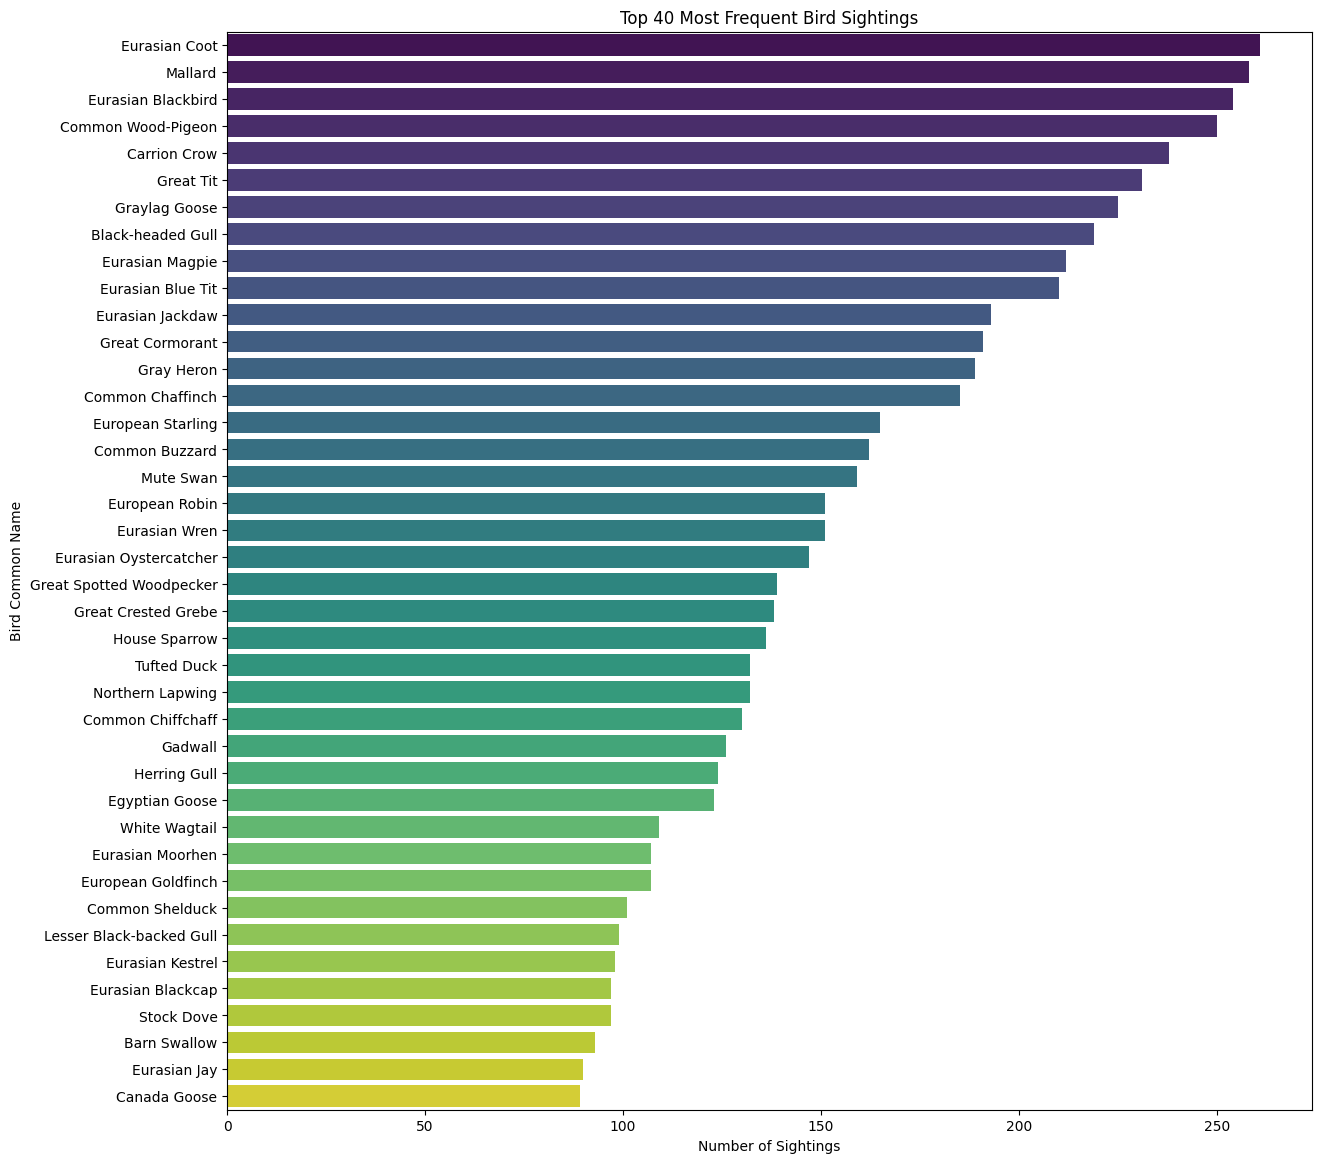

In [13]:
# Count the frequency of each bird sighting
bird_counts = data['COMMON NAME'].value_counts()

# Extract the top 40
top_40 = bird_counts.head(40)

# Plot for top 40
plt.figure(figsize=(14,14))
sns.barplot(y=top_40.index, x=top_40.values, palette='viridis')
plt.title('Top 40 Most Frequent Bird Sightings')
plt.xlabel('Number of Sightings')
plt.ylabel('Bird Common Name')
plt.savefig('../images/bird_sightings.png')
plt.show()

In [14]:
protocol_counts = data ['PROTOCOL CODE'].value_counts()
print(protocol_counts)

PROTOCOL CODE
P22    7537
P21    1511
P20     636
P62     308
P33       8
Name: count, dtype: int64


In [16]:
# Get a random sample of 50 rows from the "PROTOCOL TYPE" column
#sample_protocol_type = data['PROTOCOL TYPE'].sample(50)

#print(sample_protocol_type)


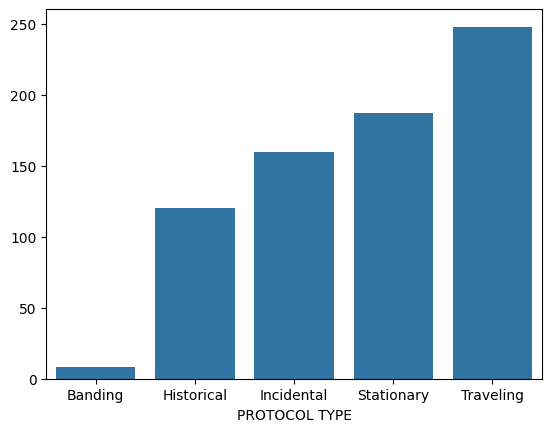

In [17]:
grouped = data.groupby('PROTOCOL TYPE')

diversity_counts = grouped['COMMON NAME'].nunique()

sns.barplot (x=diversity_counts.index, y=diversity_counts.values)

plt.savefig('../images/sighting_types.png')







In [18]:
# Investigating that CODE and TYPE match for number of values

pivot_table = data.pivot_table(index='PROTOCOL CODE', columns='PROTOCOL TYPE', values='COMMON NAME', aggfunc='count')
print(pivot_table)

PROTOCOL TYPE  Banding  Historical  Incidental  Stationary  Traveling
PROTOCOL CODE                                                        
P20                NaN         NaN       636.0         NaN        NaN
P21                NaN         NaN         NaN      1511.0        NaN
P22                NaN         NaN         NaN         NaN     7537.0
P33                8.0         NaN         NaN         NaN        NaN
P62                NaN       308.0         NaN         NaN        NaN


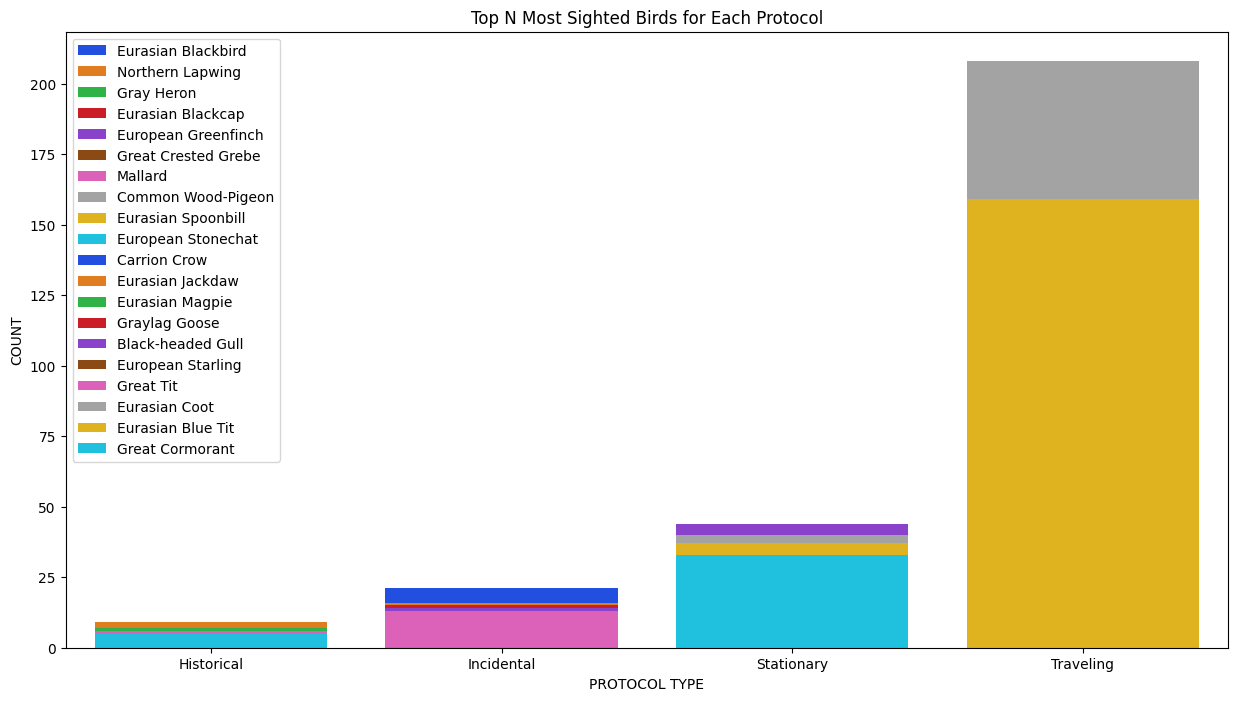

In [19]:
# use barplot to show sightings by protocol histogram1

protocols_of_interest = ['Stationary', 'Traveling', 'Historical', 'Incidental']
filtered_data = data[data['PROTOCOL TYPE'].isin(protocols_of_interest)]
bird_counts_by_protocol = filtered_data.groupby(['PROTOCOL TYPE', 'COMMON NAME']).size().reset_index(name='COUNT')

N = 10
top_birds_by_protocol = bird_counts_by_protocol.groupby('PROTOCOL TYPE').apply(lambda x: x.nlargest(N, 'COUNT')).reset_index(drop=True)
palette = sns.color_palette("bright", 20)
plt.figure(figsize=(15, 8))
sns.barplot(data=top_birds_by_protocol, x='PROTOCOL TYPE', y='COUNT', hue='COMMON NAME', dodge=False, palette=palette)
plt.legend(loc='upper left')
plt.title('Top N Most Sighted Birds for Each Protocol')
plt.savefig('../images/bird_sightings_by_type_histo.png')
plt.show()


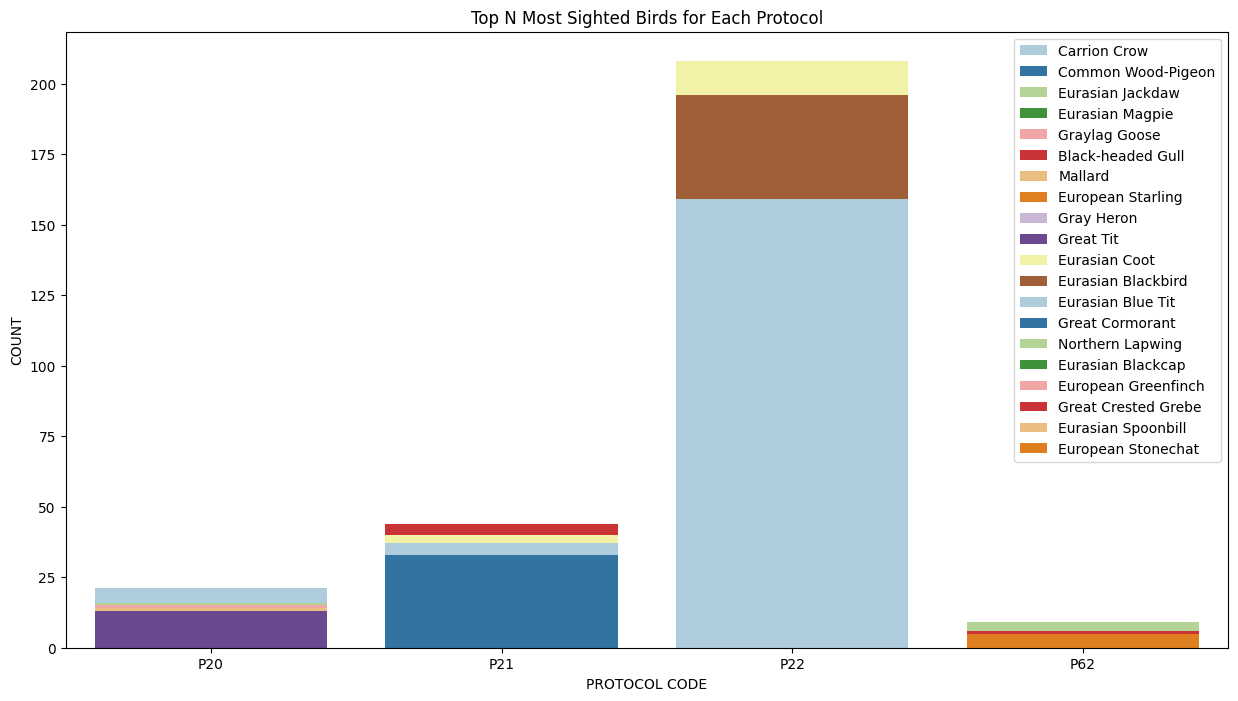

In [20]:
# use barplot to show sightings by protocol histogram2
protocols_of_interest = ['P20', 'P62', 'P21', 'P22']
filtered_data = data[data['PROTOCOL CODE'].isin(protocols_of_interest)]
bird_counts_by_protocol = filtered_data.groupby(['PROTOCOL CODE', 'COMMON NAME']).size().reset_index(name='COUNT')


N = 10
top_birds_by_protocol = bird_counts_by_protocol.groupby('PROTOCOL CODE').apply(lambda x: x.nlargest(N, 'COUNT')).reset_index(drop=True)

palette = sns.color_palette("Paired", 20)
plt.figure(figsize=(15, 8))
sns.barplot(data=top_birds_by_protocol, x='PROTOCOL CODE', y='COUNT', hue='COMMON NAME', dodge=False, palette=palette)
plt.legend(loc='upper right')
plt.title('Top N Most Sighted Birds for Each Protocol')
plt.show()

In [21]:
top_birds_by_protocol_type = data.groupby(['PROTOCOL TYPE', 'COMMON NAME']).size().reset_index(name='COUNT')
top_10_by_protocol_type = top_birds_by_protocol_type.groupby('PROTOCOL TYPE').apply(lambda x: x.nlargest(10, 'COUNT')).reset_index(drop=True)
print(top_10_by_protocol_type)


   PROTOCOL TYPE             COMMON NAME  COUNT
0        Banding            Barn Swallow      1
1        Banding            Common Swift      1
2        Banding       Eurasian Blackcap      1
3        Banding  Eurasian Marsh-Harrier      1
4        Banding        Eurasian Wryneck      1
5        Banding               Great Tit      1
6        Banding           Marsh Warbler      1
7        Banding                 Redwing      1
8     Historical      Eurasian Blackbird      9
9     Historical        Northern Lapwing      9
10    Historical              Gray Heron      7
11    Historical       Eurasian Blackcap      6
12    Historical     European Greenfinch      6
13    Historical     Great Crested Grebe      6
14    Historical                 Mallard      6
15    Historical      Common Wood-Pigeon      5
16    Historical      Eurasian Spoonbill      5
17    Historical      European Stonechat      5
18    Incidental            Carrion Crow     21
19    Incidental      Common Wood-Pigeon

In [22]:
top_birds_by_protocol_code = data.groupby(['PROTOCOL CODE', 'COMMON NAME']).size().reset_index(name='COUNT')
top_10_by_protocol_code = top_birds_by_protocol_code.groupby('PROTOCOL CODE').apply(lambda x: x.nlargest(10, 'COUNT')).reset_index(drop=True)
print(top_10_by_protocol_code)


   PROTOCOL CODE             COMMON NAME  COUNT
0            P20            Carrion Crow     21
1            P20      Common Wood-Pigeon     16
2            P20        Eurasian Jackdaw     16
3            P20         Eurasian Magpie     15
4            P20           Graylag Goose     15
5            P20       Black-headed Gull     14
6            P20                 Mallard     14
7            P20       European Starling     13
8            P20              Gray Heron     13
9            P20               Great Tit     13
10           P21       Black-headed Gull     44
11           P21        Eurasian Jackdaw     41
12           P21           Eurasian Coot     40
13           P21               Great Tit     39
14           P21            Carrion Crow     37
15           P21      Eurasian Blackbird     37
16           P21       Eurasian Blue Tit     37
17           P21           Graylag Goose     34
18           P21                 Mallard     34
19           P21         Great Cormorant

C:\Users\desgr\AppData\Local\Temp\ipykernel_18500\2815761302.py:14: UserWarning: 
The palette list has fewer values (20) than needed (29) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(data=top_birds_by_protocol, x='PROTOCOL TYPE', y='COUNT', hue='COMMON NAME', palette=palette, size=6, marker='D')


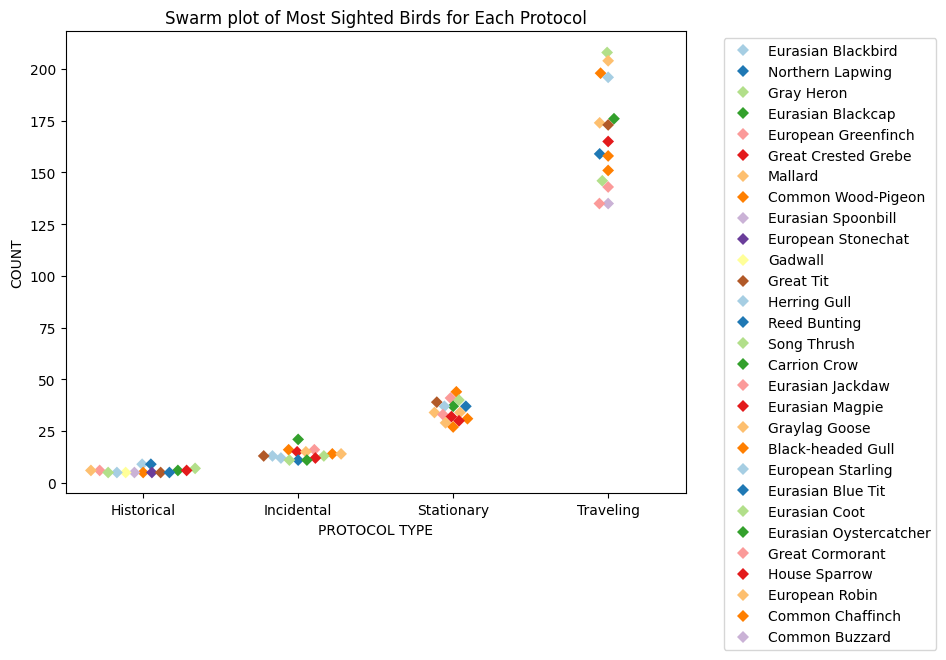

In [24]:
# the barplot was not great for displaying the information, use a swarm plot instead

# select the observation types and filter by bird name
protocols_of_interest = ['Stationary', 'Traveling', 'Historical', 'Incidental']
filtered_data = data[data['PROTOCOL TYPE'].isin(protocols_of_interest)]
bird_counts_by_protocol = filtered_data.groupby(['PROTOCOL TYPE', 'COMMON NAME']).size().reset_index(name='COUNT')


N = 15
top_birds_by_protocol = bird_counts_by_protocol.groupby('PROTOCOL TYPE').apply(lambda x: x.nlargest(N, 'COUNT')).reset_index(drop=True)

# plot the grpah
plt.figure(figsize=(8, 6))  # Adjust width here
sns.swarmplot(data=top_birds_by_protocol, x='PROTOCOL TYPE', y='COUNT', hue='COMMON NAME', palette=palette, size=6, marker='D')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('Swarm plot of Most Sighted Birds for Each Protocol')
plt.savefig('../images/bird_by_sighting_type.png', bbox_inches='tight')
plt.show()




In [25]:
#filter data
# this includes frequencies of less than 5 for the categorial values
# H0 is that bird sightings and the type of observation are unrelated

stat_protocols_of_interest = ['Stationary', 'Traveling', 'Historical', 'Incidental']
bird_frequencies = data.groupby(['PROTOCOL TYPE', 'COMMON NAME']).size().reset_index(name='COUNT')
filtered_data = data[data['PROTOCOL TYPE'].isin(stat_protocols_of_interest)]


# make the contingency table
contingency_table = pd.crosstab(filtered_data['COMMON NAME'], filtered_data['PROTOCOL TYPE'])

# Performing the Chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# show the results of the test
print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

# show if H0 is dependent or not
if p_val < 0.05:
    print("The observed distribution of bird sightings is dependent on the protocol code.")
else:
    print("The observed distribution of bird sightings is independent of the protocol code.")

Chi-squared Statistic: 1324.9197540938808
P-value: 7.970435261335829e-28
Degrees of Freedom: 807
Expected Frequencies Table:
[[0.3082466  0.63650921 1.51220977 7.54303443]
 [0.03082466 0.06365092 0.15122098 0.75430344]
 [0.03082466 0.06365092 0.15122098 0.75430344]
 ...
 [0.06164932 0.12730184 0.30244195 1.50860689]
 [0.03082466 0.06365092 0.15122098 0.75430344]
 [0.03082466 0.06365092 0.15122098 0.75430344]]
The observed distribution of bird sightings is dependent on the protocol code.


In [26]:
# filter data
stat_protocols_of_interest5 = ['Stationary', 'Traveling', 'Historical', 'Incidental']
bird_frequencies5 = data.groupby(['PROTOCOL TYPE', 'COMMON NAME']).size().reset_index(name='COUNT')

# filtered_data = data[data['PROTOCOL TYPE'].isin(stat_protocols_of_interest)]

# filtering by frequency greater than 5
filtered_bird_frequencies5 = bird_frequencies5[bird_frequencies5['COUNT'] > 5]


# amke contingency table
contingency_table5 = pd.crosstab(filtered_bird_frequencies5['COMMON NAME'], filtered_bird_frequencies5['PROTOCOL TYPE'])

# perform the Chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table5)

# show the results of the test
print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

if p_val < 0.05:
    print("The observed distribution of bird sightings is dependent on the protocol code.")
else:
    print("The observed distribution of bird sightings is independent of the protocol code.")

Chi-squared Statistic: 193.2593629343629
P-value: 1.0
Degrees of Freedom: 447
Expected Frequencies Table:
[[0.0260223  0.14869888 0.27509294 0.55018587]
 [0.0260223  0.14869888 0.27509294 0.55018587]
 [0.05204461 0.29739777 0.55018587 1.10037175]
 [0.05204461 0.29739777 0.55018587 1.10037175]
 [0.0260223  0.14869888 0.27509294 0.55018587]
 [0.0260223  0.14869888 0.27509294 0.55018587]
 [0.0260223  0.14869888 0.27509294 0.55018587]
 [0.0260223  0.14869888 0.27509294 0.55018587]
 [0.07806691 0.44609665 0.82527881 1.65055762]
 [0.0260223  0.14869888 0.27509294 0.55018587]
 [0.0260223  0.14869888 0.27509294 0.55018587]
 [0.0260223  0.14869888 0.27509294 0.55018587]
 [0.0260223  0.14869888 0.27509294 0.55018587]
 [0.0260223  0.14869888 0.27509294 0.55018587]
 [0.07806691 0.44609665 0.82527881 1.65055762]
 [0.07806691 0.44609665 0.82527881 1.65055762]
 [0.05204461 0.29739777 0.55018587 1.10037175]
 [0.0260223  0.14869888 0.27509294 0.55018587]
 [0.07806691 0.44609665 0.82527881 1.65055762]
 

We have different p-values when filtering for > 5 (recommended for chi-test) so the distribution of sightings is independent. The Null Hypothesis is shown to be true when count is > 5. The value of 1 might be due to the limited size of this dataset.

In [ ]:
# Group by STATE and count the sightings
area_sightings = data.groupby('STATE').size().sort_values(ascending=False)

# Display top areas
print(area_sightings)


In [ ]:
# extract just the state code from 'STATE CODE'
data['STATE_CODE_ONLY'] = data['STATE CODE'].str.split('-').str.get(1)

# create a mapping from 'STATE' to 'STATE_CODE_ONLY'
state_code_mapping = dict(data[['STATE', 'STATE_CODE_ONLY']].drop_duplicates().values)

# group by 'STATE' and get the count of sightings
state_counts = data.groupby('STATE').size().sort_values(ascending=False)

# sort 'state_code_mapping' according to 'state_counts' to maintain the order
sorted_states = state_counts.index.tolist()
sorted_state_codes_only = [state_code_mapping[state] for state in sorted_states]

# plot
plt.figure(figsize=(14, 7))
bars = sns.barplot(x=sorted_state_codes_only, y=state_counts.values)

# legend with province for description
legend_patches = [mpatches.Patch(color=bar.get_facecolor(), label=state) for bar, state in zip(bars.patches, sorted_states)]
plt.legend(handles=legend_patches, title="Province")

plt.xlabel("Province Code")
plt.ylabel("Number of Sightings")
plt.title("Number of Sightings by Province")
plt.tight_layout()
plt.savefig('../images/bird_by_province.png', bbox_inches='tight')

plt.show()


In [ ]:
# import population data
population_data = pd.read_csv(r'..\data\raw\population_by_state.csv', sep=';')

# orders the provinces in same order as 
population_data = population_data.set_index('STATE').loc[sorted_states].reset_index()


# Plotting the data
plt.figure(figsize=(14, 7))
sns.barplot(data=population_data, x='STATE', y='POPULATION', palette='viridis')

plt.title('Human Population by Province')
plt.xlabel('Province')
plt.ylabel('Population in millions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../images/population_by_state.png', bbox_inches='tight')
plt.show()


In [ ]:
plt.figure(figsize=(14, 7))

# plot the data
sns.scatterplot(data=merged_data, x='POPULATION', y='SIGHTINGS', color='blue', s=100)

# plot the regression line
plt.plot(merged_data['POPULATION'], results.predict(X), color='red')

# add province name to each data po
for idx, row in merged_data.iterrows():
    plt.annotate(row['STATE'], (row['POPULATION'], row['SIGHTINGS']), fontsize=9)

plt.title('Bird Sightings vs. Human Population by State')
plt.xlabel('Human Population in millions')
plt.ylabel('Number of Bird Sightings')
plt.tight_layout()
plt.savefig('../images/regression_sightings_population_labeled.png', bbox_inches='tight')
plt.show()


In [ ]:


# merge the dataframes on 'STATE'
merged_data = pd.merge(state_counts.reset_index(), population_data, on='STATE', how='left')

# rename cols for ease
merged_data.columns = ['STATE', 'SIGHTINGS', 'POPULATION']

# Using statsmodels to perform linear regression
X = merged_data['POPULATION']
y = merged_data['SIGHTINGS']
X = sm.add_constant(X)  # Adding a constant term to the predictor

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())



In [ ]:
 # group by Province and count the sightings
area_sightings = data.groupby('STATE').size().sort_values(ascending=False)

# display top areas
print(area_sightings)

# extract month from OBSERVATION DATE
data['MONTH'] = pd.to_datetime(data['OBSERVATION DATE']).dt.month

# group by month and count sightings
monthly_sightings = data.groupby('MONTH').size()

# plot sightings
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sightings.index, y=monthly_sightings.values)

# month abbreviations as x-tick labels
plt.xticks(monthly_sightings.index, [calendar.month_abbr[i] for i in monthly_sightings.index])

plt.title('Bird Sightings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sightings')
plt.grid(True)
plt.savefig('../images/bird_by_sighting_type.png', bbox_inches='tight')
plt.show()




As we might expect the spring months and breeding season has many more observations.

In [ ]:
import calendar

# take the day of the week from 'OBSERVATION DATE'
data['DAY_OF_WEEK'] = pd.to_datetime(data['OBSERVATION DATE']).dt.dayofweek

# group by 'DAY_OF_WEEK' and count sightings
weekly_sightings = data.groupby('DAY_OF_WEEK').size()

# plot sightings
plt.figure(figsize=(12, 6))
sns.lineplot(x=weekly_sightings.index, y=weekly_sightings.values)

# day names as x-tick labels
plt.xticks(weekly_sightings.index, [calendar.day_name[i] for i in weekly_sightings.index])

plt.title('Bird Sightings by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Sightings')
plt.grid(True)
plt.savefig('../images/bird_sightings_by_day.png', bbox_inches='tight')
plt.show()


As one might expect, the sightings increase markedly around the weekends with a decline from Monday to Thursday, long weekends with Mondays and Fridays are also a probable factor for Monday and Friday being higher than other days.